# Importing librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [2]:
calories = pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
exercise = pd.read_csv('exercise.csv')
exercise.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
calories_data = pd.concat([exercise, calories["Calories"]], axis = 1)
calories_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

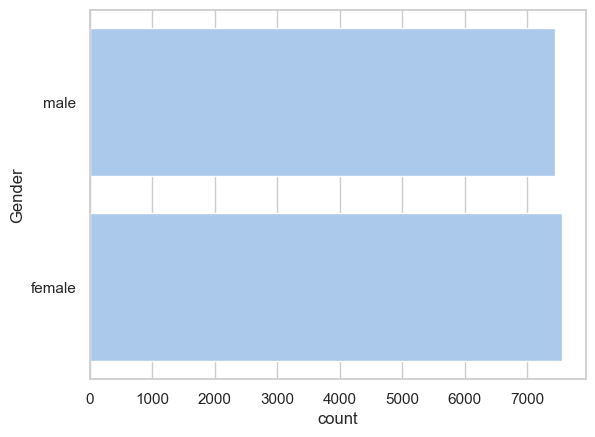

In [8]:
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("pastel")
sns.countplot(calories_data['Gender'])


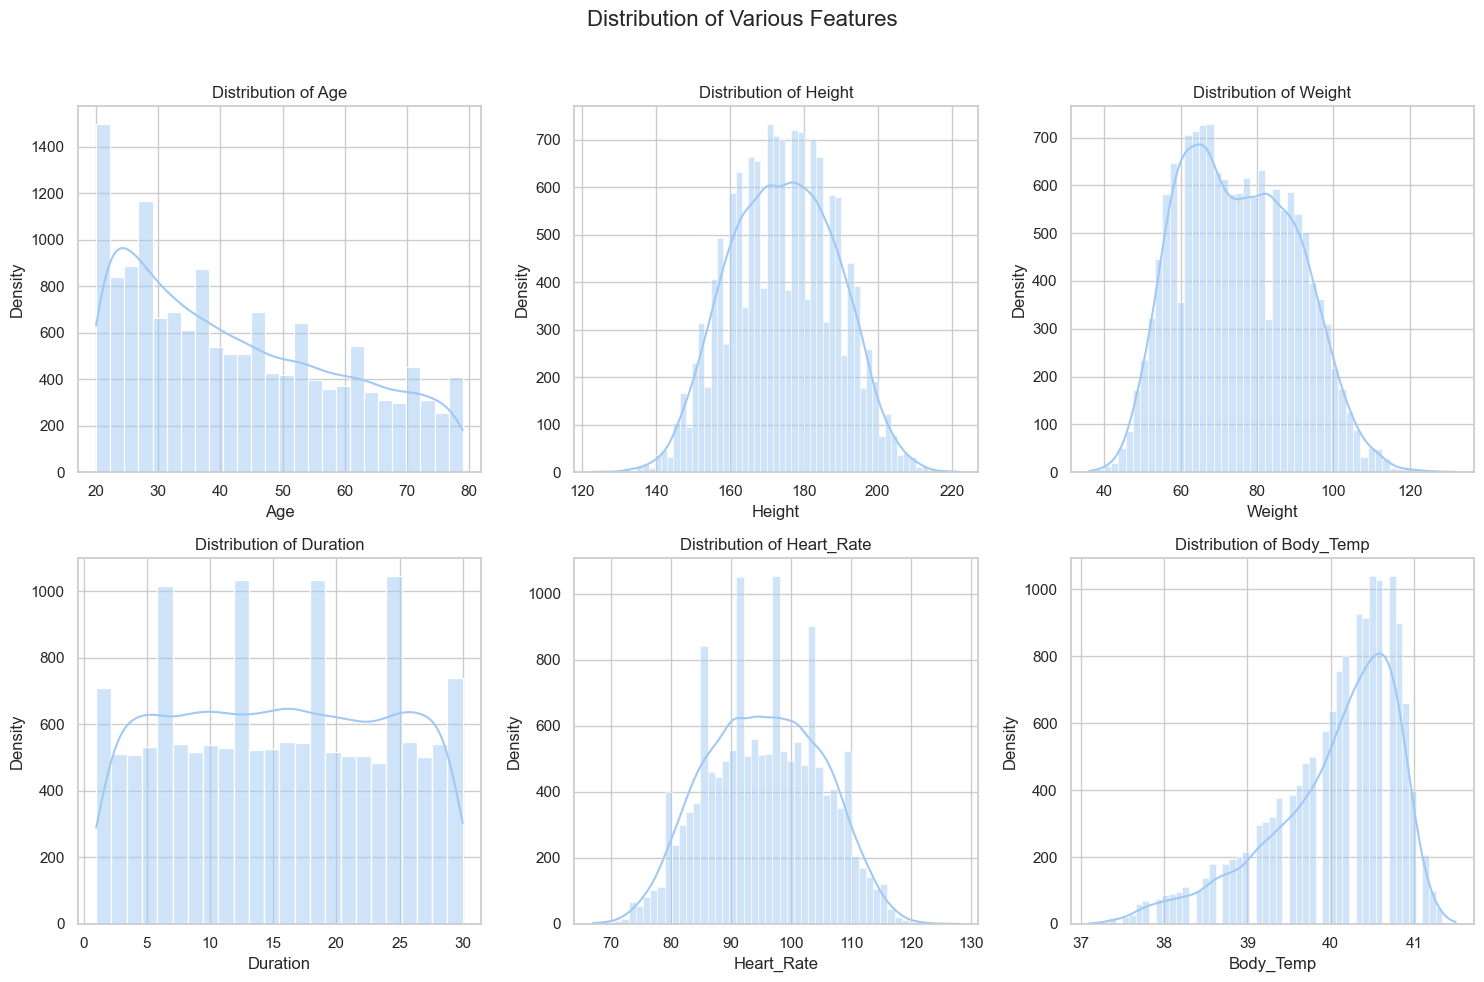

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distribution of Various Features", fontsize=16)
variables = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
for var, ax in zip(variables, axes.flatten()):
    sns.histplot(calories_data[var], kde=True, ax=ax)  
    ax.set_title(f"Distribution of {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Density")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

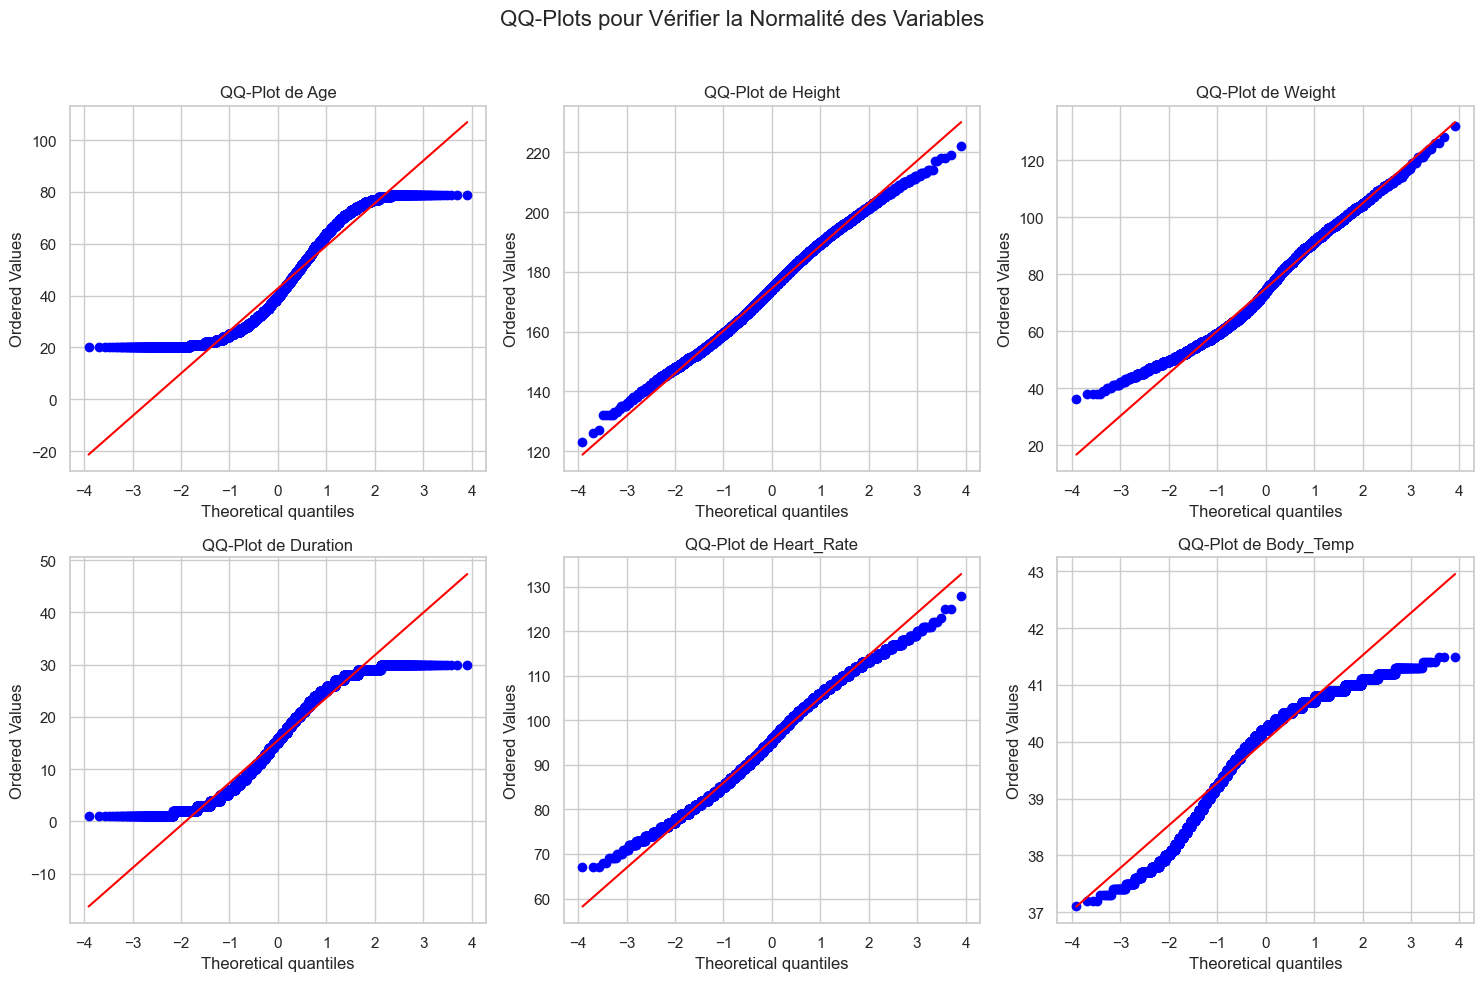

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("QQ-Plots pour Vérifier la Normalité des Variables", fontsize=16)

for var, ax in zip(variables, axes.flatten()):
    
    stats.probplot(calories_data[var], dist="norm", plot=ax)
    ax.set_title(f"QQ-Plot de {var}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

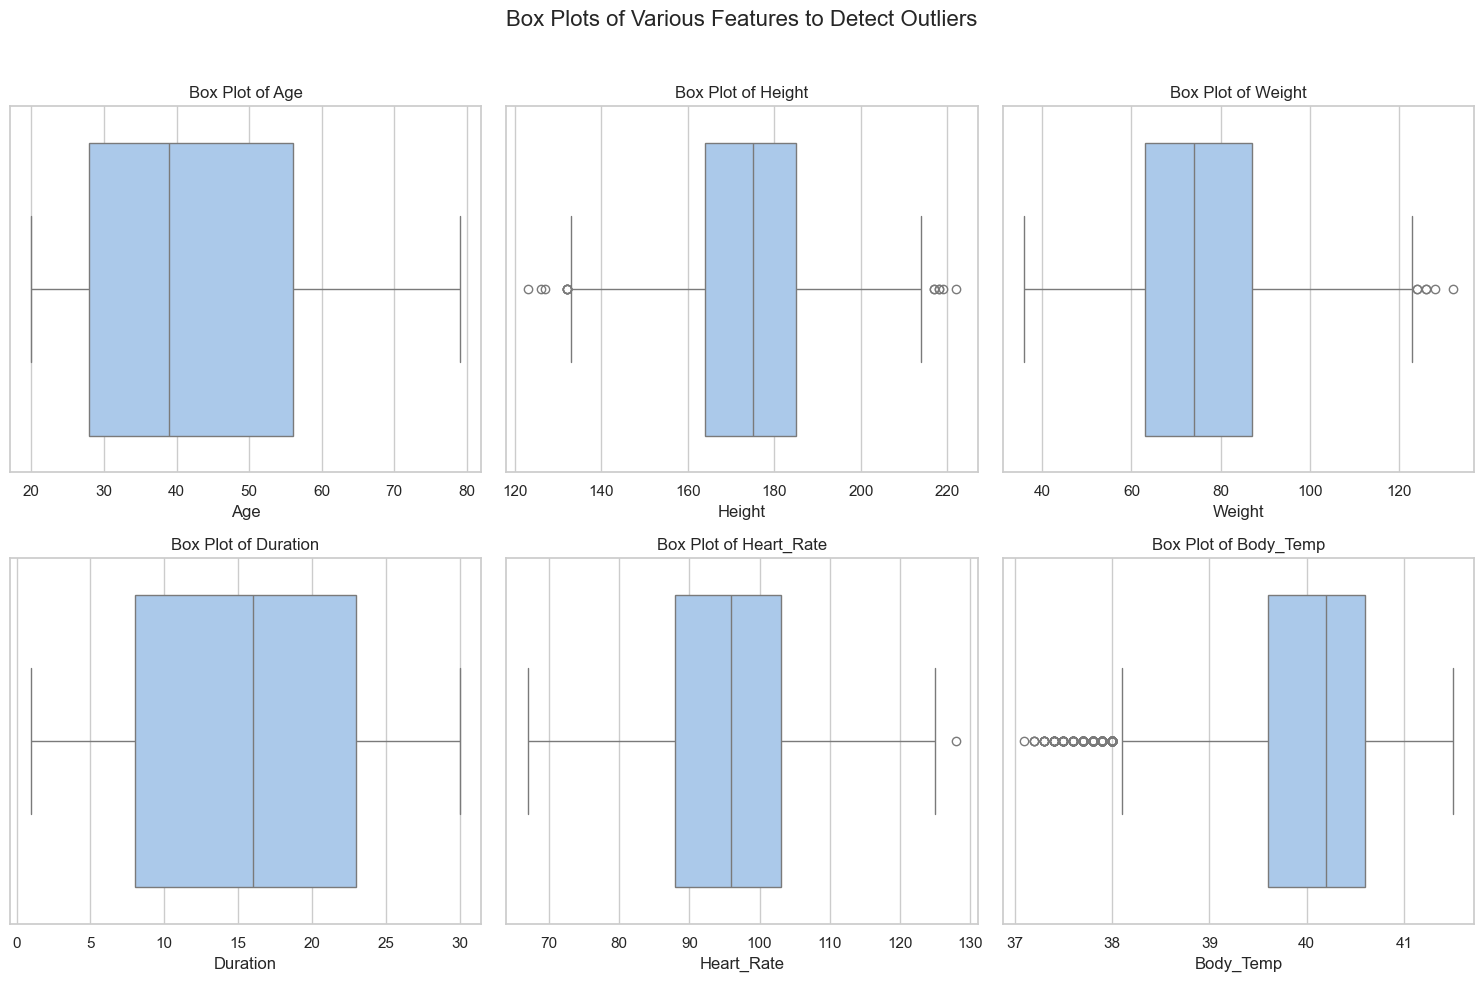

In [11]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Box Plots of Various Features to Detect Outliers", fontsize=16)
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(data=calories_data, x=var, ax=ax)
    ax.set_title(f"Box Plot of {var}")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Axes: >

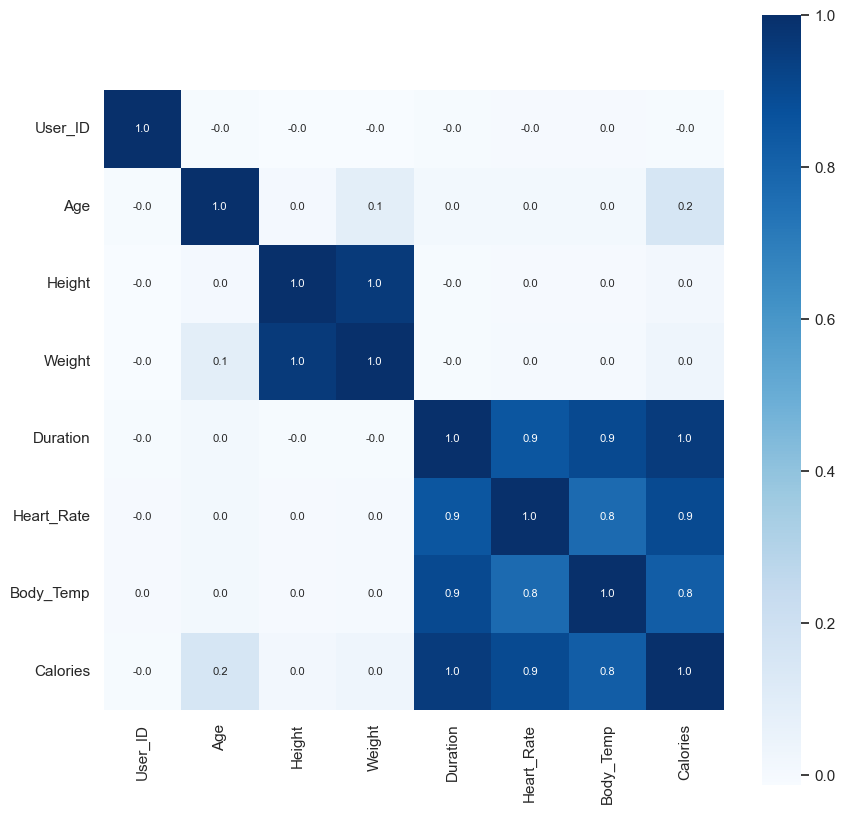

In [12]:
correlation_matrix = calories_data.drop(columns=['Gender']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace= True)

C:\Users\Ben Youssef\AppData\Local\Temp\ipykernel_28960\693951255.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace= True)


In [14]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:
X = calories_data.drop(columns= ['User_ID', 'Calories'], axis = 1)
Y = calories_data['Calories'] 

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}


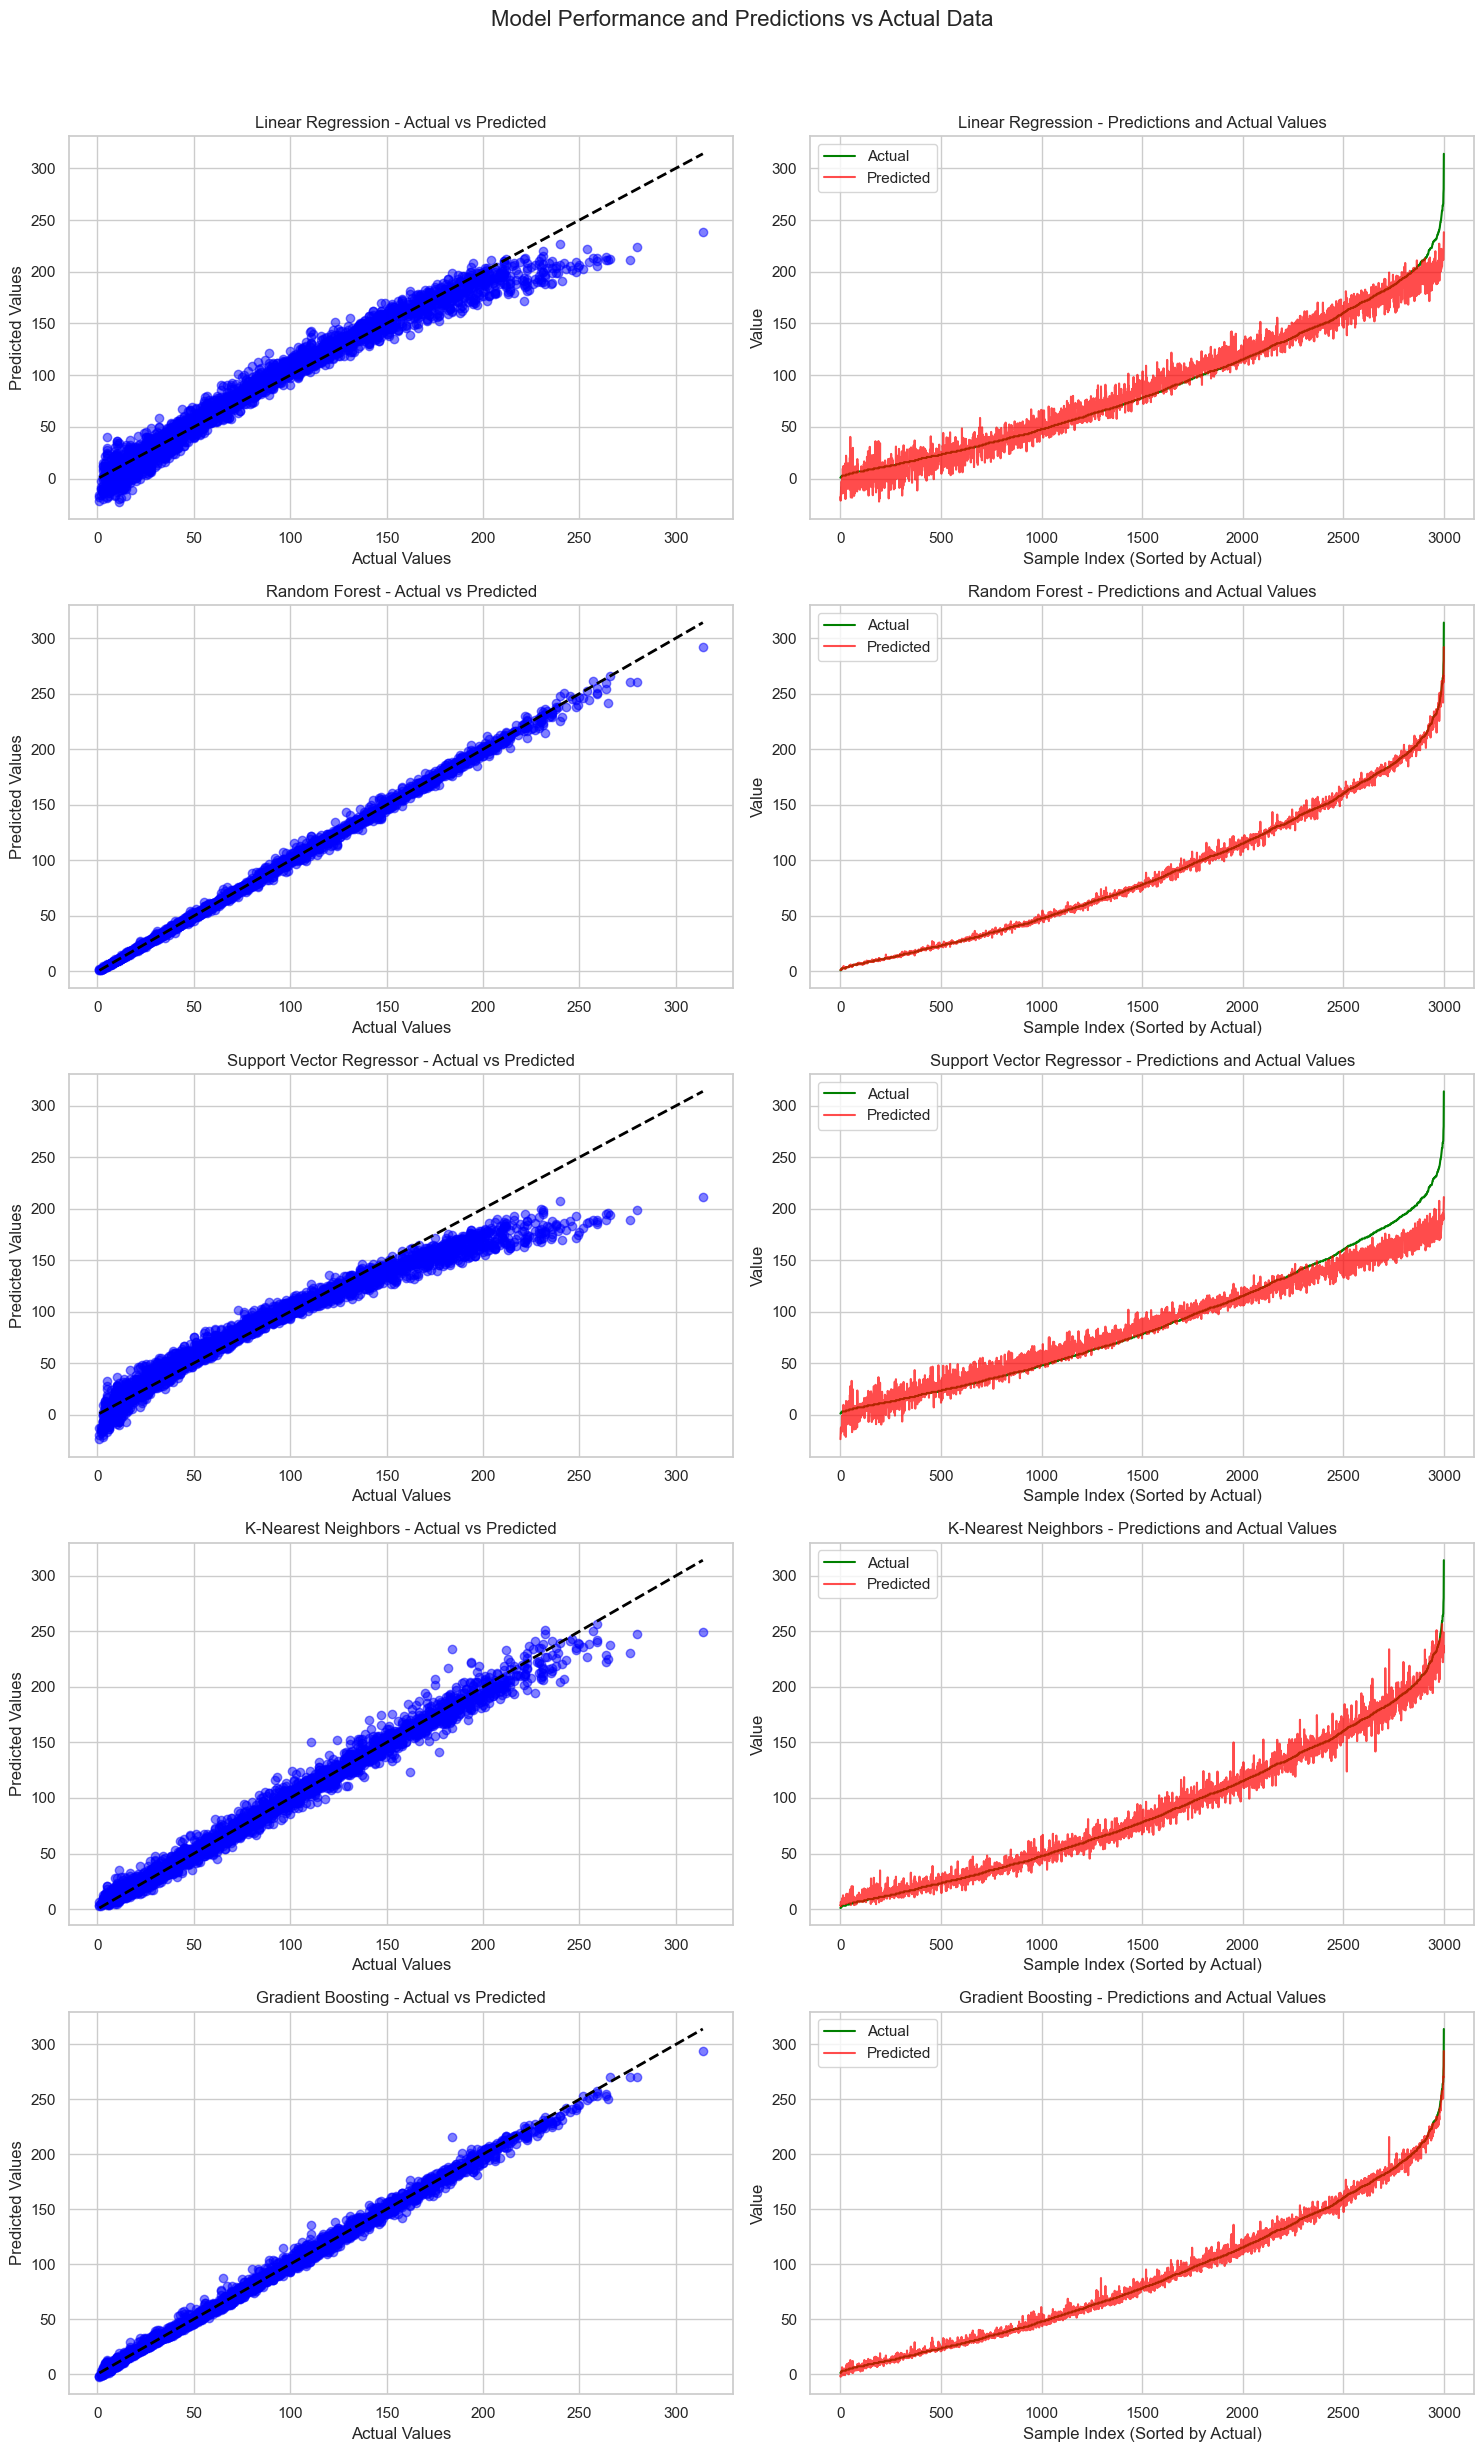

In [18]:
results = []
best_model = None
best_score = float('inf') 
fig, axes = plt.subplots(len(models), 2, figsize=(15, 5*len(models)))
fig.suptitle("Model Performance and Predictions vs Actual Data", fontsize=16)
for idx, (name, model) in enumerate(models.items()):
   
    model.fit(X_train, Y_train)
    test_data_prediction = model.predict(X_test)
    mae = mean_absolute_error(Y_test, test_data_prediction)
    mse = mean_squared_error(Y_test, test_data_prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, test_data_prediction)
    mae_scorer = make_scorer(mean_absolute_error)
    cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring=mae_scorer)
    mean_cv_mae = cv_scores.mean()
    std_cv_mae = cv_scores.std()
    results.append({
        "Model": name,
        "Test MAE": mae,
        "Test MSE": mse,
        "Test RMSE": rmse,
        "Test R²": r2,
        "CV Mean MAE": mean_cv_mae,
        "CV Std MAE": std_cv_mae
    })
    if mean_cv_mae < best_score:
        best_score = mean_cv_mae
        best_model = model

    axes[idx, 0].scatter(Y_test, test_data_prediction, alpha=0.5, color="blue")
    axes[idx, 0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  
    axes[idx, 0].set_title(f"{name} - Actual vs Predicted")
    axes[idx, 0].set_xlabel("Actual Values")
    axes[idx, 0].set_ylabel("Predicted Values")

    sorted_indices = np.argsort(Y_test)  
    axes[idx, 1].plot(np.arange(len(Y_test)), np.array(Y_test)[sorted_indices], label="Actual", color="green")
    axes[idx, 1].plot(np.arange(len(Y_test)), np.array(test_data_prediction)[sorted_indices], label="Predicted", color="red", alpha=0.7)
    axes[idx, 1].set_title(f"{name} - Predictions and Actual Values")
    axes[idx, 1].set_xlabel("Sample Index (Sorted by Actual)")
    axes[idx, 1].set_ylabel("Value")
    axes[idx, 1].legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


results_df = pd.DataFrame(results)

In [19]:
print(results_df)

                      Model   Test MAE    Test MSE  Test RMSE   Test R²  \
0         Linear Regression   8.385188  130.087074  11.405572  0.966879   
1             Random Forest   1.682387    7.062775   2.657588  0.998202   
2  Support Vector Regressor  10.620614  243.293102  15.597856  0.938056   
3       K-Nearest Neighbors   5.052533   51.568213   7.181101  0.986870   
4         Gradient Boosting   2.778304   14.568995   3.816935  0.996291   

   CV Mean MAE  CV Std MAE  
0     8.336128    0.100616  
1     1.927773    0.070584  
2    11.697788    0.143065  
3     5.356533    0.065319  
4     2.719588    0.073295  


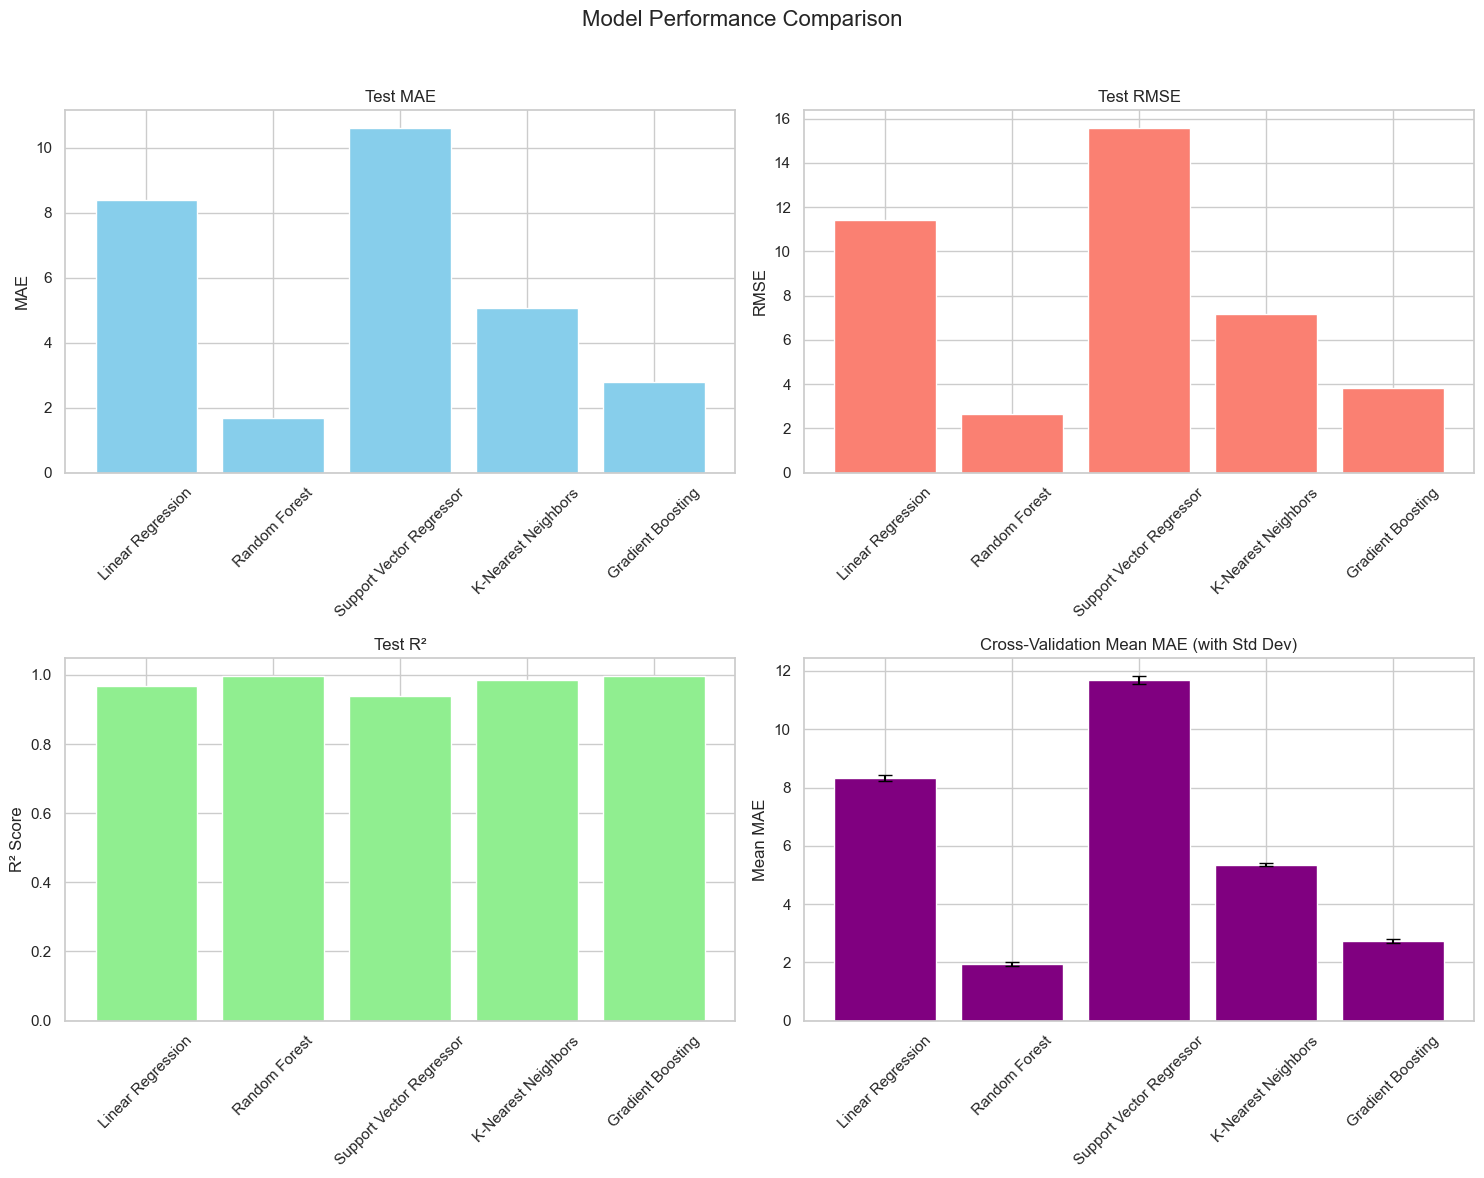

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Model Performance Comparison", fontsize=16)
axes[0, 0].bar(results_df["Model"], results_df["Test MAE"], color="skyblue")
axes[0, 0].set_title("Test MAE")
axes[0, 0].set_ylabel("MAE")
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(results_df["Model"], results_df["Test RMSE"], color="salmon")
axes[0, 1].set_title("Test RMSE")
axes[0, 1].set_ylabel("RMSE")
axes[0, 1].tick_params(axis='x', rotation=45)


axes[1, 0].bar(results_df["Model"], results_df["Test R²"], color="lightgreen")
axes[1, 0].set_title("Test R²")
axes[1, 0].set_ylabel("R² Score")
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(results_df["Model"], results_df["CV Mean MAE"], yerr=results_df["CV Std MAE"], capsize=5, color="purple")
axes[1, 1].set_title("Cross-Validation Mean MAE (with Std Dev)")
axes[1, 1].set_ylabel("Mean MAE")
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [21]:
print(best_model)

RandomForestRegressor()


In [22]:
filename = 'trained_best_model.sav'
pickle.dump(best_model, open(filename,'wb'))

In [23]:
loaded_model = pickle.load(open('trained_best_model.sav','rb'))